(6362620, 6)
(6362620,)


Text(0, 0.5, 'Frequency')

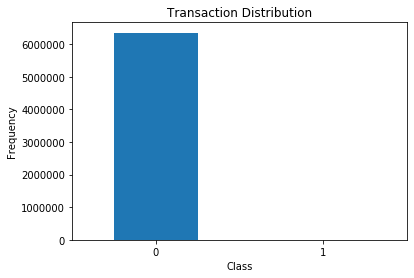

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/creditCardLog.csv')
dataset = dataset.drop(columns=['step','nameOrig','nameDest','isFlaggedFraud'])
#T = dataset.iloc[1,:].values
X = dataset.iloc[:, :6].values
y = dataset.iloc[:, 6].values

print(X.shape)
print(y.shape)

count_class = pd.value_counts(dataset['isFraud'],sort = True)
count_class.plot(kind = 'bar',rot=0)
plt.title('Transaction Distribution')
#plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')



In [0]:
#get fraud and normal dataset
fraud = dataset[dataset['isFraud']==1]
normal = dataset[dataset['isFraud']==0]
print(fraud.shape,normal.shape)

(8213, 7) (6354407, 7)


In [0]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.compose import ColumnTransformer

label_encoder_X = LabelEncoder() 
X[: , 0] = label_encoder_X.fit_transform(X[:,0])
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [0]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X.tolist())
X = X.astype('float64')

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X)
X= imputer.transform(X)

#X[:,0] = label_encoder_X.fit_transform(X[:,0])
#onehotencoder = OneHotEncoder(categorical_features = [0])
#X = onehotencoder.fit_transform(X).toarray()
label_encoder_y = LabelEncoder() 
y = label_encoder_y.fit_transform(y)

#avoid trap
X = X[:,1:]


In [0]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(random_state = 0)
X,y = nm.fit_sample(X,y)
print(X.shape)
print(y.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

(16426, 9)
(16426,)


In [0]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)'''


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test Data Accuracy: 0.9831
0.98310759397352


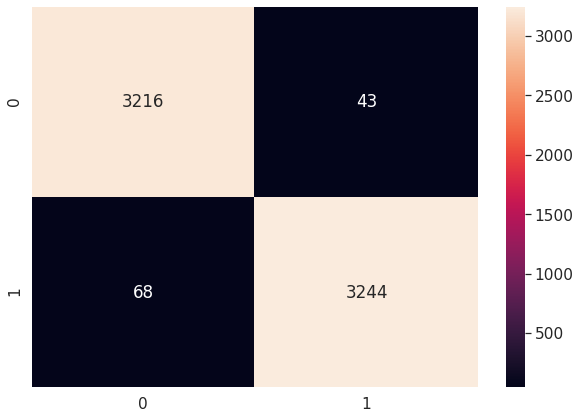

In [0]:

#Fitting Logistic Regression on training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

#Predic test set results
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix(contains  correct and incorrect predictions)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))


0.971998173793943
Test Data Accuracy: 0.9720


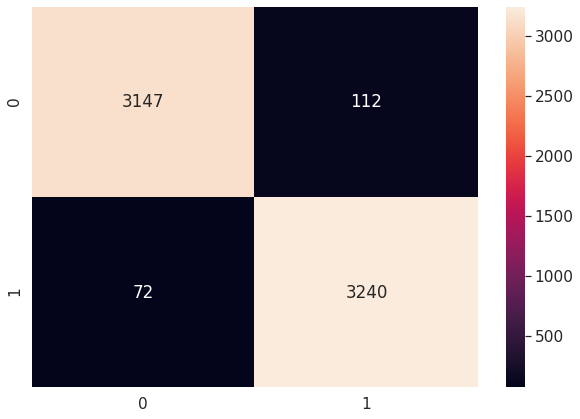

In [0]:
# Fitting SVM with linear kernel classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

#Making the Confusion Matrix(contains  correct and incorrect predictions)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

0.9360827880079136
Test Data Accuracy: 0.9361


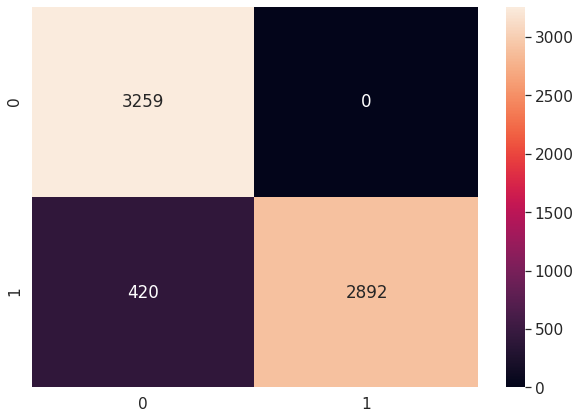

In [0]:
# Fitting SVM with rbf kernel classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

#Making the Confusion Matrix(contains  correct and incorrect predictions)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))